<a href="https://colab.research.google.com/github/zanggmzn/123200135_123200137_123200152_tugas2tpm/blob/main/hepatitis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

# Data Understanding

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import pandas as pd

In [ ]:
# memberikan nama pada tiap kolom
kolomVariabel=['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']

In [ ]:
# dibuat dataframe dengan atribut kolomVariabel
dataframe = pd.read_csv("hepatitis.data", names=kolomVariabel)

In [ ]:
# cek kolom baris
dataframe.shape

(155, 20)

In [ ]:
dataframe.head(5)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


# Data Preprocessing : Replace NaN

In [ ]:
# replace "?" with NaN
dataframe.replace("?",np.nan, inplace = True)
# hitung jumlah total NaN pada tiap kolom
dataframe.isnull().sum() #jd yg dihitung data yg NaN

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

In [ ]:
#jadi isi dataframe_ori itu data yg udah direplace sama NaN
dataframe_ori = dataframe

In [ ]:
# dataframe yg sudah direplace NaN
dataframe.head(10)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,NaN,NaN,NaN,NaN,NaN,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,NaN,NaN,NaN,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,NaN,48,4.4,NaN,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,120,3.9,NaN,1


In [ ]:
# Mulai pengelompokan untuk numeric dan categorical
variabelNumeric= ['AGE', 'BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK PHOSPHATE', 'SGOT']

In [ ]:
variabelCategorical = ['SEX' , 'STEROID', 'ANTIVIRALS', 'FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE',
'SPIDERS','ASCITES','VARICES', 'HISTOLOGY']

# Data Preprocessing : Missing Value
Menangani missing value menggunakan 2 cara:
<br>a)	Imputasi menggunakan metode rata-rata(means) = untuk data numerik
<br>b)	Imputasi menggunakan metode value yang sering muncul = untuk data categorical

### Data Numerik

In [ ]:
# ubah tipe data menjadi float untuk perhitungan means
########################################
dataframe["BILIRUBIN"] = dataframe.BILIRUBIN.astype(float)
dataframe["PROTIME"] = dataframe.PROTIME.astype(float)
dataframe["ALK PHOSPHATE"] = dataframe["ALK PHOSPHATE"].astype(float)
dataframe["SGOT"] = dataframe.SGOT.astype(float)
dataframe["ALBUMIN"] = dataframe.ALBUMIN.astype(float)

In [ ]:
# mengecek tipe data
dataframe[variabelNumeric].dtypes

AGE                int64
BILIRUBIN        float64
PROTIME          float64
ALBUMIN          float64
ALK PHOSPHATE    float64
SGOT             float64
dtype: object

In [ ]:
dataframe[variabelNumeric].describe()
# count = total data yang tidak NaN
# mean = rata-rata
# std = standar deviasi

,AGE,BILIRUBIN,PROTIME,ALBUMIN,ALK PHOSPHATE,SGOT
count,155.000000,149.000000,88.000000,139.000000,126.000000,151.00000
mean,41.200000,1.427517,61.852273,3.817266,105.325397,85.89404
std,12.565878,1.212149,22.875244,0.651523,51.508109,89.65089
min,7.000000,0.300000,0.000000,2.100000,26.000000,14.00000
25%,32.000000,0.700000,46.000000,3.400000,74.250000,31.50000
50%,39.000000,1.000000,61.000000,4.000000,85.000000,58.00000
75%,50.000000,1.500000,76.250000,4.200000,132.250000,100.50000
max,78.000000,8.000000,100.000000,6.400000,295.000000,648.00000


In [ ]:
#replacing NA with means value
# POINT PENTING BUAT REPLACE
for variabelnumeric in variabelNumeric:
    dataframe[variabelnumeric] = dataframe[variabelnumeric].fillna(dataframe[variabelnumeric].mean())

In [ ]:
dataframe[variabelNumeric].head(10)

,AGE,BILIRUBIN,PROTIME,ALBUMIN,ALK PHOSPHATE,SGOT
0,30,1.000000,61.852273,4.000000,85.000000,18.00000
1,50,0.900000,61.852273,3.500000,135.000000,42.00000
2,78,0.700000,61.852273,4.000000,96.000000,32.00000
3,31,0.700000,80.000000,4.000000,46.000000,52.00000
4,34,1.000000,61.852273,4.000000,105.325397,200.00000
5,34,0.900000,75.000000,4.000000,95.000000,28.00000
6,51,1.427517,61.852273,3.817266,105.325397,85.89404
7,23,1.000000,61.852273,3.817266,105.325397,85.89404
8,39,0.700000,61.852273,4.400000,105.325397,48.00000
9,30,1.000000,61.852273,3.900000,105.325397,120.00000


In [ ]:
dataframe[variabelNumeric].isnull().sum()

AGE              0
BILIRUBIN        0
PROTIME          0
ALBUMIN          0
ALK PHOSPHATE    0
SGOT             0
dtype: int64

In [ ]:
#dataframe.to_csv("D:/IF/SEM 5/ML/Mycsvfile3.csv")

### Data Categorical

In [ ]:
#Impute the values using scikit-learn SimpleImpute Class
#Mulai mengisi missing value dengan kata yang sering muncul
from sklearn.impute import SimpleImputer
# jadi simpleimputer itu tu sebuah function isine library sklearn.
# yg emg nanti fungsinya itu untuk ngisi missing value dengan strategi most frequent words

# memanggil fungsi buat ngereplace missing value dengan Most Frequent Words
imp_freq = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

#fit in di dataframe_ori,krn dataframe udah ke proses buat numerik
#jd yg diproses di datacategorical tu dataframe ori
imp_freq.fit(dataframe_ori)

#membuat variabel imputed_train_dataframe dengan imp.freq dari dataframe_ori
imputed_train_dataframe = imp_freq.transform(dataframe_ori)

In [ ]:
imputed_train_dataframe

array([[2, 30, 2, ..., 4.0, 61.85227272727273, 1],
       [2, 50, 1, ..., 3.5, 61.85227272727273, 1],
       [2, 78, 1, ..., 4.0, 61.85227272727273, 1],
       ...,
       [2, 61, 1, ..., 4.1, 61.85227272727273, 2],
       [2, 53, 2, ..., 4.1, 48.0, 2],
       [1, 43, 1, ..., 3.1, 42.0, 2]], dtype=object)

In [ ]:
# var imputedDF diisi imputed_train_dataframe yg sudah diisi dataframe_ori
# lalu var columns diisi kolomVariabel
# dataframe yg dix itu ada di ImputedDF : bakal kepake sampe selesai
imputedDf = pd.DataFrame(imputed_train_dataframe,columns=kolomVariabel)

In [ ]:
imputedDf[variabelCategorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SEX              155 non-null    object
 1   STEROID          155 non-null    object
 2   ANTIVIRALS       155 non-null    object
 3   FATIGUE          155 non-null    object
 4   MALAISE          155 non-null    object
 5   ANOREXIA         155 non-null    object
 6   LIVER BIG        155 non-null    object
 7   LIVER FIRM       155 non-null    object
 8   SPLEEN PALPABLE  155 non-null    object
 9   SPIDERS          155 non-null    object
 10  ASCITES          155 non-null    object
 11  VARICES          155 non-null    object
 12  HISTOLOGY        155 non-null    object
dtypes: object(13)
memory usage: 15.9+ KB


In [ ]:
# mengubah tipe data variabelCategorical
imputedDf[variabelCategorical] = imputedDf[variabelCategorical].astype(int)

In [ ]:
# ngecount tiap jumlah dr jenis kategori
imputedDf[variabelCategorical].apply(pd.Series.value_counts)

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
1,139,76,24,101,61,32,25,60,30,51,20,18,85
2,16,79,131,54,94,123,130,95,125,104,135,137,70


In [ ]:
imputedDf.head(5)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4.0,61.852273,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,61.852273,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4.0,61.852273,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105.325397,200.0,4.0,61.852273,1


In [ ]:
#imputedDf.to_csv("D:/IF/SEM 5/ML/Mycsvfile4.csv")

In [ ]:
# convert kelas menjadi integer
imputedDf["Class"] = imputedDf["Class"].astype(int)

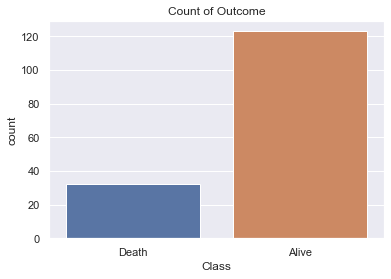

In [ ]:
class_count=sns.countplot(x="Class", data=imputedDf)
plt.gca().set_xticklabels(['Death','Alive']);
class_count.set_title("Count of Outcome")
class_count.figure.savefig('class_count.png')

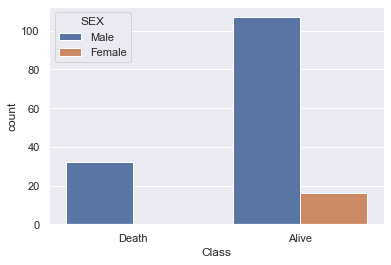

In [ ]:
class_count=sns.countplot(x="Class",hue="SEX", data=imputedDf)
plt.gca().set_xticklabels(['Death','Alive']);
plt.legend(title='SEX', loc='upper left', labels=['Male', 'Female'])
plt.show(class_count)
##################################################################################### 1

## Data Preprocessing : Feature Engineering
Agar proses model yang dihasilkan mampu memprediksi atau memecahkan masalah lebih akurat.
<br>a)	Standardizing the scale.
<br>b)	Mengatasi Imbalance Data dengan Teknik SMOTE

### Standardizing the Scale

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report,confusion_matrix

In [ ]:
A = imputedDf.drop(["Class","PROTIME"],axis=1)

In [ ]:
A.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4.0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4.0,1
3,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4.0,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105.325397,200.0,4.0,1


In [ ]:
stdScalar = StandardScaler()
datascale = stdScalar.fit_transform(A)
# jadi ini si A yg berisi dataframe diatas itu

In [ ]:
datascale #INI PENTING BUAT PROSES MODELINGNYA YG DIPAKE

array([[-0.89419175,  2.94745653, -1.01954582, ..., -0.76983432,
         0.29724559, -0.90748521],
       [ 0.70257923, -0.33927557, -1.01954582, ..., -0.49770404,
        -0.51608387, -0.90748521],
       [ 2.93805862, -0.33927557,  0.98082889, ..., -0.61109166,
         0.29724559, -0.90748521],
       ...,
       [ 1.58080328, -0.33927557, -1.01954582, ..., -0.74715679,
         0.45991148,  1.10194633],
       [ 0.94209488,  2.94745653, -1.01954582, ..., -0.75849555,
         0.45991148,  1.10194633],
       [ 0.14370939, -0.33927557,  0.98082889, ..., -0.75849555,
        -1.16674744,  1.10194633]])

In [ ]:
kolomVariabel2=['AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN',"HISTOLOGY"]
imputedDfScale= pd.DataFrame(datascale, columns=kolomVariabel2)
# ini adalah proses untuk membuat datascale dijadiin dataframe lagi

In [ ]:
imputedDfScale

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,-0.894192,2.947457,-1.019546,0.428026,1.367615,0.805566,0.510061,-2.280351,0.794719,0.489898,0.700275,0.384900,0.362473,-0.360938,-4.394144e-01,-0.769834,0.297246,-0.907485
1,0.702579,-0.339276,-1.019546,0.428026,-0.731200,0.805566,0.510061,-2.280351,0.794719,0.489898,0.700275,0.384900,0.362473,-0.445364,6.415347e-01,-0.497704,-0.516084,-0.907485
2,2.938059,-0.339276,0.980829,0.428026,-0.731200,0.805566,0.510061,0.438529,0.794719,0.489898,0.700275,0.384900,0.362473,-0.614217,-2.016056e-01,-0.611092,0.297246,-0.907485
3,-0.814353,-0.339276,0.980829,-2.336308,1.367615,0.805566,0.510061,0.438529,0.794719,0.489898,0.700275,0.384900,0.362473,-0.614217,-1.282555e+00,-0.384316,0.297246,-0.907485
4,-0.574838,-0.339276,0.980829,0.428026,1.367615,0.805566,0.510061,0.438529,0.794719,0.489898,0.700275,0.384900,0.362473,-0.360938,-3.072242e-16,1.293820,0.297246,-0.907485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.383225,-0.339276,0.980829,0.428026,-0.731200,-1.241364,-1.960548,0.438529,0.794719,0.489898,-1.428011,-2.598076,-2.758824,5.211214,-3.072242e-16,1.770048,-0.841416,1.101946
151,0.223548,-0.339276,0.980829,0.428026,-0.731200,0.805566,0.510061,0.438529,-1.258306,0.489898,0.700275,0.384900,0.362473,-0.445364,4.469639e-01,0.636172,0.785243,1.101946
152,1.580803,-0.339276,-1.019546,0.428026,-0.731200,-1.241364,0.510061,-2.280351,-1.258306,0.489898,-1.428011,0.384900,0.362473,-0.529791,-6.556042e-01,-0.747157,0.459911,1.101946
153,0.942095,2.947457,-1.019546,0.428026,-0.731200,0.805566,0.510061,0.438529,0.794719,-2.041241,-1.428011,0.384900,-2.758824,0.061195,-5.258903e-01,-0.758496,0.459911,1.101946


In [ ]:
####SPLITTING
X = datascale #beisi semua label kecuali kelas
Y = imputedDf["Class"]  # kalo y berisi kelas doang

# Split dataset in training and test datasets
# Saat imbalance
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((124, 18), (31, 18), (124,), (31,))

X Train = 124 data 18 kolom
X Test  = 31 data 18 kolom
Jadi si X berisi data yang tanpa kelas dan protime

Y Train = 124 data 1 kolom, nah 1 kolom itu kolom kelas
Y Test = 31 data 1 kolom (kolom juga kolom kelas)

### Imbalance Data

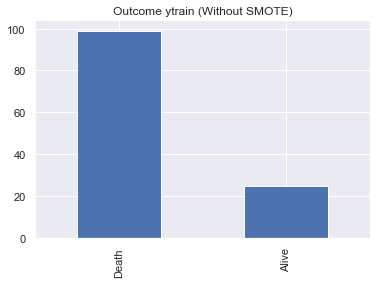

In [ ]:
class_nobalance = pd.Series(Y_train).value_counts().plot.bar()
class_nobalance.set_title("Outcome ytrain (Without SMOTE)")
plt.gca().set_xticklabels(['Death','Alive']);
class_nobalance.figure.savefig('class_nobalance.png')

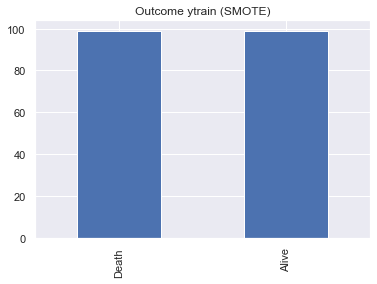

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 33)
# jadi variabel sm berisi function SMOTE dengan random state 33
# terus yg di smote itu si x train sama y trainnya
# ravel biasanya digunain di variabel Y buat ngubah 2d arrry ke array 1d atau matriks
X_train_new, Y_train_new = sm.fit_resample(X_train, Y_train.ravel())


class_balance = pd.Series(Y_train_new).value_counts().plot.bar()
#class balance kita itung Y trainnya buat nanti ngeplot di barplot
class_balance.set_title("Outcome ytrain (SMOTE)")
plt.gca().set_xticklabels(['Death','Alive']);
class_balance.figure.savefig('class_balance.png')

############################################################################## 2

# Machine Learning Classifier

In [ ]:
from sklearn.model_selection import cross_validate,cross_val_predict
# jadi menggunakan K-folds Cross Validation
# variabel scoreDF untuk menyimpan performansi dr bayes
scoreDF = pd.DataFrame(columns=['accuracy','f1','precision','recall',"roc_auc","type","balance"])

Cross Validation digunakan karena merupakan salah satu metode yang terbaik untuk memvalidasi data yang
akan digunakan. Salah satu contoh dar K-Fold Cross Validation adalah 10-Fold Cross Validation. Teknik ini
akan membagi kumpulan data menjadi 10 subset dengan ukuran yang sama, sembilan dari 10 subset data
digunakan untuk pelatihan, sementara satu subset yang tertinggal digunakan untuk pengujian.

### Implementasi Naive Bayes
Dataset mengandung beberapa fitur dari variabel kontinyu, dan categorical, serta relatif kecil maka Naive Bayes cocok untuk diimplementasikan daripada model non-parametric lainnya

In [ ]:
from sklearn.naive_bayes import GaussianNB
## nguji yg datanya belum balance
classifier = GaussianNB()

# jadi si x train dan y train akan di fit ke dalam model bayes buat membuat model ML
# score itu berisi hasil dari cross validate
# kan training itu buat ngehasil model kan, kalo testing dpt akurasi
# x train sama y train kita masukin ke model bayes=> maka terbentuklah suatu model pembelajaran buat hepatitis ini
score = cross_validate(classifier, X_train, Y_train, cv=10,scoring=['accuracy','f1','precision','recall',"roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))

Test accuracy:0.6384615384615384


In [ ]:
## nguji si datanya balance
classifier = GaussianNB()

#cv 10 kali percobaan
scoreBal = cross_validate(classifier, X_train_new, Y_train_new, cv=10, scoring=['accuracy', 'f1','precision','recall',"roc_auc"])
print("Test accuracy:{}".format(scoreBal["test_accuracy"].mean()))

Test accuracy:0.8181578947368422


In [ ]:
## yg data blm balance
data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_precision"].mean(), score["test_recall"].mean(),score["test_roc_auc"].mean(),
      "NaiveB","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );
##################################
## yg data balance
data =[scoreBal["test_accuracy"].mean(), scoreBal["test_f1"].mean(), scoreBal["test_precision"].mean(), scoreBal["test_recall"].mean(),scoreBal["test_roc_auc"].mean(),
      "NaiveB","Yes"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, )
scoreDF

C:\Users\asus\AppData\Local\Temp\ipykernel_19120\3076150514.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );
C:\Users\asus\AppData\Local\Temp\ipykernel_19120\3076150514.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, )


,accuracy,f1,precision,recall,roc_auc,type,balance
0,0.638462,0.512338,0.35631,0.933333,0.883148,NaiveB,No
1,0.818158,0.839866,0.754545,0.95,0.924556,NaiveB,Yes


In [ ]:
y_pred = cross_val_predict(classifier, X_train_new, Y_train_new, cv=10)
conf_mat = confusion_matrix(Y_train_new, y_pred)

In [ ]:
conf_mat

array([[94,  5],
       [31, 68]], dtype=int64)

[TP FN
 FP TN]
TP = 94
FN = 5
FP = 31
TN = 68
-> Precision = TP/TP+FP = 94/94+31= 0.75
-> Recall = TP/TP+FN = 94/94+5= 0.95
-> F1 Score = 2xPxR/(P+R) = 0.84
KESIMPULAN: HIGH RECALL LOW PRECISION
-> good : Jadi disini data negatif dikenali sebagai positif
-> FN rendah FP tinggi, yg gabole FN Tinggi

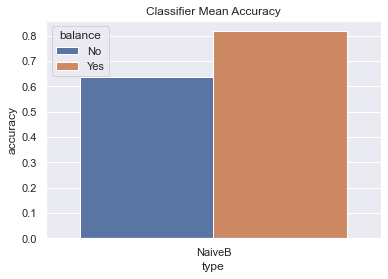

In [ ]:
accuracyPlot = sns.barplot(x='type',y='accuracy',data=scoreDF, hue="balance")
accuracyPlot.set_title("Classifier Mean Accuracy")
accuracyPlot.figure.savefig('accuracyPlot.png')